In [1]:
#importing the important packages 
import pandas as pd


In [2]:
#importing the data csv file called housepricedata
df = pd.read_csv('housepricedata.csv')

In [3]:
#data from the file, displayed with a call to df
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
#converting the data into arrays so that the machine can process 
dataset = df.values 


In [5]:
#printing out the variable dataset defined before and it will print out the values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
#spliting the dataset into input features 
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
#importing skikit learn packages
from sklearn import preprocessing 

In [11]:
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split 

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
from keras.models import Sequential 
from keras.layers import Dense

In [24]:
#creating the hidden layers in our model 
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [25]:
#configuring the model 
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
#training the data 
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5078 - val_loss: 0.6815 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.4990 - val_loss: 0.6770 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6770 - accuracy: 0.5088 - val_loss: 0.6731 - val_accuracy: 0.5342
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5294 - val_loss: 0.6695 - val_accuracy: 0.5662
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.5930 - val_loss: 0.6660 - val_accuracy: 0.6301
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.6429 - val_loss: 0.6624 - val_accuracy: 0.6849
Epoch 7/100
32/32 [==============================] - 0s 985us/step - loss: 0.6614 - accuracy: 0.7241 - val_loss: 0.6587 - val_accuracy: 0.7215
Epoch 8/

32/32 [==============================] - 0s 969us/step - loss: 0.3342 - accuracy: 0.8816 - val_loss: 0.3537 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 0s 969us/step - loss: 0.3308 - accuracy: 0.8826 - val_loss: 0.3522 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8748 - val_loss: 0.3464 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.8787 - val_loss: 0.3448 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8767 - val_loss: 0.3440 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8826 - val_loss: 0.3423 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 0s 969us/step - loss: 0.3163 - accuracy: 0.8826 - val_loss: 0.3375 - val_accuracy: 0.8813
Epoch 65/100


In [27]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 714us/step - loss: 0.3327 - accuracy: 0.8539


0.853881299495697

In [28]:
import matplotlib.pyplot as plt 

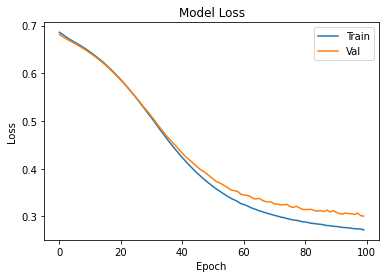

In [30]:
#visualizing the training loss and validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

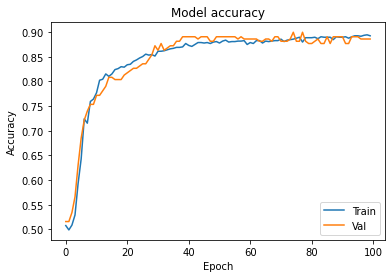

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [35]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [36]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 18ms/step - loss: 0.4582 - accuracy: 0.7984 - val_loss: 0.4488 - val_accuracy: 0.8082
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3223 - accuracy: 0.8757 - val_loss: 0.3603 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3179 - accuracy: 0.8679 - val_loss: 0.3569 - val_accuracy: 0.8311
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.3156 - accuracy: 0.8767 - val_loss: 0.3235 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2570 - accuracy: 0.8943 - val_loss: 0.2851 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3022 - accuracy: 0.8728 - val_loss: 0.3247 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2719 - accuracy: 0.8816 - val_loss: 0.2945 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 0s 16ms/step - loss: 0.1515 - accuracy: 0.9325 - val_loss: 0.3139 - val_accuracy: 0.8950
Epoch 59/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1360 - accuracy: 0.9452 - val_loss: 0.3841 - val_accuracy: 0.8950
Epoch 60/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1226 - accuracy: 0.9481 - val_loss: 0.4081 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1267 - accuracy: 0.9462 - val_loss: 0.4444 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1240 - accuracy: 0.9472 - val_loss: 0.4381 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 0s 16ms/step - loss: 0.1404 - accuracy: 0.9393 - val_loss: 0.4628 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1265 - accuracy: 0.9413 - val_loss: 0.4839 - val_accuracy: 0.8767
Epoch 65/100

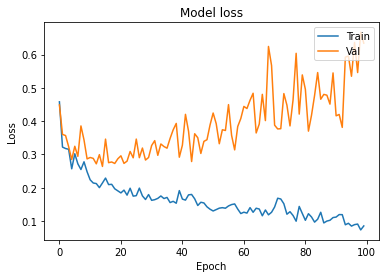

In [38]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

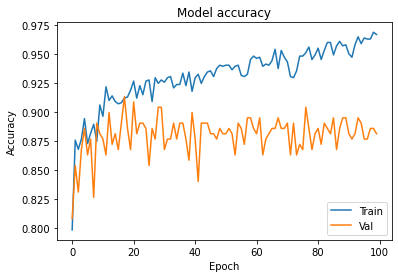

In [39]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [40]:
from keras.layers import Dropout 
from keras import regularizers


In [41]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [42]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 26ms/step - loss: 14.2505 - accuracy: 0.6223 - val_loss: 3.9332 - val_accuracy: 0.6621
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 1.6801 - accuracy: 0.8219 - val_loss: 0.7639 - val_accuracy: 0.7991
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5644 - accuracy: 0.8630 - val_loss: 0.5649 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5028 - accuracy: 0.8679 - val_loss: 0.6674 - val_accuracy: 0.7808
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5338 - accuracy: 0.8523 - val_loss: 0.4908 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4956 - accuracy: 0.8640 - val_loss: 0.4948 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4691 - accuracy: 0.8806 - val_loss: 0.4635 - val_accuracy: 0.8858
Epoch

32/32 [==============================] - 1s 22ms/step - loss: 0.4148 - accuracy: 0.8933 - val_loss: 0.4200 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4211 - accuracy: 0.8885 - val_loss: 0.4198 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4232 - accuracy: 0.8904 - val_loss: 0.4239 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 1s 23ms/step - loss: 0.4351 - accuracy: 0.8826 - val_loss: 0.4552 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4303 - accuracy: 0.8894 - val_loss: 0.4262 - val_accuracy: 0.8813
Epoch 63/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4478 - accuracy: 0.8699 - val_loss: 0.5053 - val_accuracy: 0.8493
Epoch 64/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4464 - accuracy: 0.8650 - val_loss: 0.4575 - val_accuracy: 0.8676
Epoch 65/100

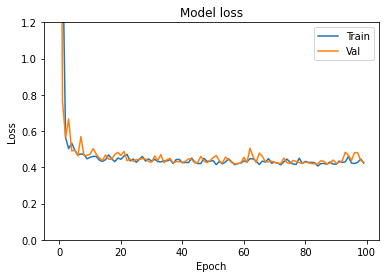

In [44]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

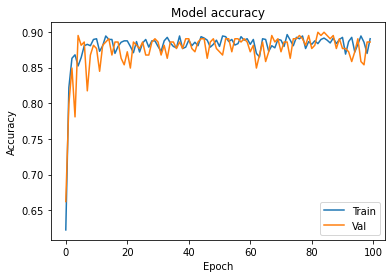

In [45]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()